### Import

In [1]:
# Import Python modules
import os, sys
import yaml
import numpy as np
import pandas as  pd
import xarray as xr

# matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.colors as mcolors
# cartopy
import cartopy.crs as ccrs
from cartopy.mpl.geoaxes import GeoAxes
# plot styles/formatting
import seaborn as sns
import cmocean.cm as cmo
import cmocean


# Path to modules
sys.path.append('../modules')

# Import my modules
from plotter import draw_basemap
from ar_funcs import get_ar_days


In [2]:
# Set up paths

path_to_data = '/home/nash/DATA/data/'                            # project data -- read only
path_to_out  = '../out/'       # output files (numerical results, intermediate datafiles) -- read & write
path_to_figs = '../figs/'      # figures


### Data

#### AR Time Series

In [3]:
# choose parameters
reanalysis = 'era5'
ssn = 'djfmam'
ceofid = 'IVT'
neofs = 2 # choose number of eofs
nk = 3 # choose number of clusters

out_path = path_to_out + ceofid + '/' + ssn + '/' + 'neof' + str(neofs) + '/k' + str(nk) + '/'
fig_path = path_to_figs + ceofid + '/' + ssn + '/'+ 'neof' + str(neofs) + '/k' + str(nk) + '/'

# import configuration file for season dictionary choice
yaml_doc = '/home/nash/DATA/repositories/AR_types/data/plt_config.yml'
config1 = yaml.load(open(yaml_doc), Loader=yaml.SafeLoader)

ar_dict = config1[ssn]
start_date = ar_dict['start_date']
end_date = ar_dict['end_date']
print(start_date, end_date)

1979-12-01 9:00 2019-05-31 9:00


In [4]:
# if using single bound box with elevation mask
bound_box = [20, 40, 65, 97]
trackIDs, df1 = get_ar_days(reanalysis, start_date, end_date, subregions=False, bbox=bound_box, elev_thres=1000.)
df1

# # if using 3 subregions and threshold
# trackIDs, df = get_ar_days(reanalysis, start_date, end_date, subregions=True, bbox=None, thresh=0.05)
# df

,ar
time,
1979-12-01 09:00:00,1.0
1979-12-02 09:00:00,1.0
1979-12-03 09:00:00,0.0
1979-12-04 09:00:00,0.0
1979-12-05 09:00:00,0.0
...,...
2019-05-27 09:00:00,0.0
2019-05-28 09:00:00,0.0
2019-05-29 09:00:00,1.0


In [5]:
idx = (df1.ar > 0)
df_tmp = df1.loc[idx]
# get list of AR days remove the hours
times_lst = df_tmp.index.strftime("%Y-%m-%d").tolist()
print(len(times_lst))

6634


In [6]:
# daily ARs and trackIDs for just DJFMAM
filepath = '/home/nash/DATA/repositories/AR_types/out/IVT/djfmam/neof2/k3/AR-types_ALLDAYS.csv'
df1 = pd.read_csv(filepath)
df1 = df1.rename(columns={'Unnamed: 0': 'time'})
df1 = df1.set_index(pd.to_datetime(df1['time']))
df1.index = df1.index.strftime("%Y-%m-%d")
df1 = df1.drop(columns=['time'])
df1 = df1.reset_index()

tmp = pd.read_csv('/home/nash/DATA/repositories/AR_types/out/DJFMAM_ARS_TRACKID_daily.csv')
tmp

df = pd.merge(df1, tmp, how='outer', on='time')
df = df.set_index(df.time)
df = df.drop(columns=['time'])
df

,AR_CAT,kidmap
time,,
1979-12-01,2,2861.0
1979-12-02,1,2861.0
1979-12-03,0,NaN
1979-12-04,0,NaN
1979-12-05,0,NaN
...,...,...
2019-05-27,0,NaN
2019-05-28,0,NaN
2019-05-29,1,128807.0


In [7]:
idx = (df.AR_CAT > 0)
df_tmp = df.loc[idx]
# get list of AR days remove the hours

times_lst2 = df_tmp.index
print(len(times_lst2))

3157


In [8]:
df_tmp

,AR_CAT,kidmap
time,,
1979-12-01,2,2861.0
1979-12-02,1,2861.0
1979-12-08,2,2871.0
1979-12-09,1,2871.0
1979-12-16,1,2975.0
...,...,...
2019-05-19,1,128712.0
2019-05-21,1,128712.0
2019-05-24,3,128755.0


#### Global Landslide Catalog

In [9]:
fname = path_to_data + 'CH2_generated_data/Global_Landslide_Catalog_Export.csv'
df2 = pd.read_csv(fname)

# Select lat/lon grid
lonmin = 65
lonmax = 100
latmin = 20
latmax = 42

## Select Landslides within Southern Asia region
idx = (df2.latitude >= latmin) & (df2.latitude <= latmax) & (df2.longitude >= lonmin) & (df2.longitude <= lonmax)
df2 = df2.loc[idx]
df2

,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,...,country_code,admin_division_name,admin_division_population,gazeteer_closest_point,gazeteer_distance,submitted_date,created_date,last_edited_date,longitude,latitude
3,Reuters,https://in.reuters.com/article/idINIndia-41450...,1067,07/31/2009 12:00:00 AM,NaN,Dailekh district,"One person was killed in Dailekh district, pol...",Dailekh district,unknown,landslide,...,NP,Mid Western,20908.0,Dailekh,0.75395,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,81.708000,28.837800
32,One India,https://www.oneindia.com/2009/07/23/darjeeling...,1055,07/22/2009 12:00:00 AM,NaN,"Kerseong, West Bengal",The disruption of popular toy train services i...,"Kerseong, West Bengal",10km,landslide,...,IN,Bengal,46427.0,Kārsiyāng,0.15035,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,88.278800,26.882600
34,One India,https://www.oneindia.com/2009/07/23/darjeeling...,1054,07/22/2009 12:00:00 AM,NaN,"Gayabari, West Bengal",The disruption of popular toy train services i...,"Gayabari, West Bengal",10km,landslide,...,IN,Bengal,46427.0,Kārsiyāng,4.62496,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,88.314300,26.857200
39,SAARC Disaster Management Centre,http://saarc-sdmc.nic.in/latest192.asp,1048,07/02/2009 03:00:00 AM,NaN,"Deurali VDC-8 in Kaski district,",At least six people have died and two more hav...,"Deurali VDC-8 in Kaski district,",50km,landslide,...,NP,Western Region,200000.0,Pokhara,7.08117,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,83.980600,28.203900
40,SAARC Disaster Management Centre,http://saarc-sdmc.nic.in/latest192.asp,1049,07/02/2009 12:00:00 AM,NaN,"Dhapade VDC-5, Tanahun district",At least six people have died and two more hav...,"Dhapade VDC-5, Tanahun district",25km,landslide,...,NP,Western Region,0.0,Lamjung,32.28507,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,84.227900,27.944700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11019,AKI Press,http://akipress.com/news:591338/,10897,04/17/2017 04:00:00 AM,NaN,Landslide in Chyrmash,Landslide hits 3 houses,"Chyrmash (??), Ozgon, Osh, Kyrgyzstan",50km,landslide,...,NaN,NaN,NaN,NaN,NaN,07/28/2017 01:34:00 PM,12/07/2017 09:19:00 PM,02/15/2018 03:51:00 PM,73.604732,40.804379
11022,Daily World,https://dailyworld.in/nagaon-a-landslide-at-na...,11162,07/09/2017 06:45:00 PM,NaN,Landslide blocks NH-37,Following continuous rain. Article: landslide ...,"Burapahar, Nagaon, Assam",5km,landslide,...,NaN,NaN,NaN,NaN,NaN,07/10/2017 06:45:00 PM,12/20/2017 03:53:00 PM,02/15/2018 03:51:00 PM,93.131951,26.566362
11029,Greater Kashmir,http://www.greaterkashmir.com/news/jammu/lands...,10845,03/25/2017 05:32:00 PM,NaN,Barnari Sigdi Landslide,Two teenage girls died after they were buried ...,"Barnari Sigdi area, Tehsil Mughalmaidan, Kisht...",5km,landslide,...,NaN,NaN,NaN,NaN,NaN,09/21/2017 05:32:00 PM,12/05/2017 06:45:00 PM,02/15/2018 03:51:00 PM,75.680611,33.403080
11030,NBC Daily,http://www.nbcdaily.com/separate-landslides-ki...,10973,12/15/2016 05:00:00 AM,NaN,Landslide at Pub Sarania Hill,An octogenarian was killed when a sudden lands...,"Pub Sarania Hill, Guwahati, Assam, India",1km,landslide,...,NaN,NaN,NaN,NaN,NaN,07/26/2017 01:22:00 PM,12/08/2017 08:37:00 PM,02/15/2018 03:51:00 PM,91.772042,26.181606


In [12]:
times_lst2

Index(['1979-12-01', '1979-12-02', '1979-12-08', '1979-12-09', '1979-12-16',
       '1979-12-17', '1979-12-21', '1979-12-22', '1979-12-24', '1979-12-25',
       ...
       '2019-05-06', '2019-05-12', '2019-05-15', '2019-05-16', '2019-05-18',
       '2019-05-19', '2019-05-21', '2019-05-24', '2019-05-25', '2019-05-29'],
      dtype='object', name='time', length=3157)

In [41]:
df2_copy.index.normalize()

DatetimeIndex(['2009-07-31', '2009-07-22', '2009-07-22', '2009-07-02',
               '2009-07-02', '2009-07-01', '2009-07-27', '2009-07-31',
               '2010-07-29', '2010-08-06',
               ...
               '2017-04-22', '2017-03-05', '2017-04-29', '2017-04-23',
               '2017-06-23', '2017-04-17', '2017-07-09', '2017-03-25',
               '2016-12-15', '2017-04-29'],
              dtype='datetime64[ns]', name='event_date', length=2238, freq=None)

In [13]:
df2_copy = df2.set_index(pd.to_datetime(df2.event_date))

# Subset only days HMA = True
x = times_lst2
y = df2_copy.index.normalize()

df = df2_copy.loc[y.isin(x)]
df

,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,...,country_code,admin_division_name,admin_division_population,gazeteer_closest_point,gazeteer_distance,submitted_date,created_date,last_edited_date,longitude,latitude
event_date,,,,,,,,,,,,,,,,,,,,,
2007-03-19 00:00:00,Tribune India.com,NaN,37,03/19/2007 12:00:00 AM,NaN,Doba,"2 killed, 5 injured",Doba,25km,landslide,...,IN,Kashmir,14711.0,Kupwāra,18.10887,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,74.333300,33.877800
2015-04-02 00:00:00,The Northlines,http://thenorthlines.com/readMore.aspx?nid=38648,7176,04/02/2015 12:00:00 AM,NaN,Frasthar,38 houses have been damaged due to landslide,Frasthar,1km,landslide,...,IN,Kashmir,14965.0,Pattan,7.66465,07/13/2015 07:12:00 PM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,74.472500,34.158700
2016-02-22 23:00:00,The Himalayan Times,https://thehimalayantimes.com/nepal/5-missing-...,9319,02/22/2016 11:00:00 PM,NaN,base of Mt Annapurna South at Narchyang VDC,At least five persons have gone missing after ...,base of Mt Annapurna South at Narchyang VDC,25km,landslide,...,NP,Western Region,2860.0,Chitre,18.73918,08/02/2016 06:50:00 PM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,83.750800,28.587300
2014-02-28 00:00:00,eKantipur.com,http://www.ekantipur.com/2014/02/28/national/b...,5909,02/28/2014 12:00:00 AM,NaN,Mahakali Hwy 10200,Thirty-five families have been displaced by a ...,Mahakali Hwy 10200,5km,landslide,...,NP,Western Region,18317.0,Dārchulā,32.01850,08/24/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,80.670000,29.580000
2011-02-13 00:00:00,Daily News and Analysis,http://www.dnaindia.com/india/report_j-and-k-h...,3116,02/13/2011 12:00:00 AM,NaN,"Srinagar-Jammu Natl. Hwy., at Panthal, Srinaga...","Jammu-Srinagar National Highway, connecting Ka...","Srinagar-Jammu Natl. Hwy., at Panthal, Srinaga...",25km,landslide,...,IN,Kashmir,3278.0,Banihāl,5.78589,09/15/2014 05:13:00 PM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,75.192106,33.338760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-05-05 13:22:00,Greater Kashmir,http://www.greaterkashmir.com/news/chenab-vall...,10818,05/05/2017 01:22:00 PM,NaN,Landslide on Jammu-Srinagar Highway,"Article: """"A landslide halted the movement of ...","Banihal, Ramban, Jammu & Kashmir",10km,landslide,...,NaN,NaN,NaN,NaN,NaN,07/14/2017 01:22:00 PM,12/05/2017 06:40:00 PM,02/15/2018 03:51:00 PM,75.192820,33.322178
2017-04-21 17:55:00,My Republica,http://www.myrepublica.com/news/18602/,10872,04/21/2017 05:55:00 PM,NaN,Landslide at Kotwada kills 4,Landslide triggered by heavy rains kills 4 people,"Jiteghat (??), Kotbada, Karnali, Nepal",5km,landslide,...,NaN,NaN,NaN,NaN,NaN,07/26/2017 05:55:00 PM,12/05/2017 07:53:00 PM,02/15/2018 03:51:00 PM,81.571404,29.169523
2017-04-06 13:19:00,The Express Tribune,https://tribune.com.pk/story/1375746/five-kill...,10946,04/06/2017 01:19:00 PM,NaN,Fatal rockfall in Gulshan-e Gahzi,Boulder from rockfall in Gulshan-e Gahzi neigh...,"Gulshan-e Gahzi, Karachi, Pakistan",1km,rock_fall,...,NaN,NaN,NaN,NaN,NaN,08/03/2017 01:19:00 PM,12/08/2017 07:55:00 PM,02/15/2018 03:51:00 PM,66.971973,24.932951


In [14]:
## find landslide associated with Feb 2010 event
idx = (df.index >= '2010-02-01') & (df.index <= '2010-02-28')

tmp = df.loc[idx]
tmp.event_description.values
# tmp

array(["One person was killed and six others were injured when five houses were damaged in landslides in Uri sector of north Kashmir's Baramulla district, officials said today. Mohammad Yousuf Gojjar was killed when his house collapsed due to the landslide at Narundi area of Uri, 100 kms from here, last evening, Sub-District Magistrate Uri Manzoor Ahmad Qadri said. Five members of his family were injured in the incident. In another incident of landslide, Ghulam Mohammad Ahangar, a teacher, was injured at Garkote-Uri and hospitalised, he said. Four residential houses were damaged by landslides in the sector.",
       'Two pilgrims on way to Vaishno Devi cave shrine died in a landslide triggered by rains in Reasi district, police said today.  As the pilgrims were proceeding towards the cave shrine in Trikuta hills from Katra base camp, they were hit by falling boulders at Hathi Matha last night',
       'A landslide struck a house in the Ranjata neighbourhood Monday, killing a woman and 

In [15]:
# fix up landslide df for merging
df_event = df.drop(columns=['event_date'])
df_event = df_event.reset_index()

# fix up AR Type df for merging
df1_event = df_tmp.reset_index()
df1_event = df1_event.rename(columns={'time': 'event_date'})
df1_event.event_date = df1_event.event_date.astype(df_event.event_date.dtype)
df1_event

# merge AR Type and Landslide event togethers
merged_data = pd.merge(df_event, df1_event, how='outer', on='event_date')
merged_data

,event_date,source_name,source_link,event_id,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,...,admin_division_population,gazeteer_closest_point,gazeteer_distance,submitted_date,created_date,last_edited_date,longitude,latitude,AR_CAT,kidmap
0,2007-03-19 00:00:00,Tribune India.com,NaN,37.0,NaN,Doba,"2 killed, 5 injured",Doba,25km,landslide,...,14711.0,Kupwāra,18.10887,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,74.333300,33.87780,1.0,88266.0
1,2015-04-02 00:00:00,The Northlines,http://thenorthlines.com/readMore.aspx?nid=38648,7176.0,NaN,Frasthar,38 houses have been damaged due to landslide,Frasthar,1km,landslide,...,14965.0,Pattan,7.66465,07/13/2015 07:12:00 PM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,74.472500,34.15870,1.0,114920.0
2,2016-02-22 23:00:00,The Himalayan Times,https://thehimalayantimes.com/nepal/5-missing-...,9319.0,NaN,base of Mt Annapurna South at Narchyang VDC,At least five persons have gone missing after ...,base of Mt Annapurna South at Narchyang VDC,25km,landslide,...,2860.0,Chitre,18.73918,08/02/2016 06:50:00 PM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,83.750800,28.58730,NaN,NaN
3,2014-02-28 00:00:00,eKantipur.com,http://www.ekantipur.com/2014/02/28/national/b...,5909.0,NaN,Mahakali Hwy 10200,Thirty-five families have been displaced by a ...,Mahakali Hwy 10200,5km,landslide,...,18317.0,Dārchulā,32.01850,08/24/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,80.670000,29.58000,3.0,111285.0
4,2011-02-13 00:00:00,Daily News and Analysis,http://www.dnaindia.com/india/report_j-and-k-h...,3116.0,NaN,"Srinagar-Jammu Natl. Hwy., at Panthal, Srinaga...","Jammu-Srinagar National Highway, connecting Ka...","Srinagar-Jammu Natl. Hwy., at Panthal, Srinaga...",25km,landslide,...,3278.0,Banihāl,5.78589,09/15/2014 05:13:00 PM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,75.192106,33.33876,1.0,101168.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,2019-05-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,128712.0
3329,2019-05-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,128712.0
3330,2019-05-24 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,128755.0
3331,2019-05-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,128756.0


In [16]:
# drop rows with no landslide
idx = (merged_data['event_id'] > 0)
merged_data = merged_data.loc[idx]
merged_data

,event_date,source_name,source_link,event_id,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,...,admin_division_population,gazeteer_closest_point,gazeteer_distance,submitted_date,created_date,last_edited_date,longitude,latitude,AR_CAT,kidmap
0,2007-03-19 00:00:00,Tribune India.com,NaN,37.0,NaN,Doba,"2 killed, 5 injured",Doba,25km,landslide,...,14711.0,Kupwāra,18.10887,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,74.333300,33.877800,1.0,88266.0
1,2015-04-02 00:00:00,The Northlines,http://thenorthlines.com/readMore.aspx?nid=38648,7176.0,NaN,Frasthar,38 houses have been damaged due to landslide,Frasthar,1km,landslide,...,14965.0,Pattan,7.66465,07/13/2015 07:12:00 PM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,74.472500,34.158700,1.0,114920.0
2,2016-02-22 23:00:00,The Himalayan Times,https://thehimalayantimes.com/nepal/5-missing-...,9319.0,NaN,base of Mt Annapurna South at Narchyang VDC,At least five persons have gone missing after ...,base of Mt Annapurna South at Narchyang VDC,25km,landslide,...,2860.0,Chitre,18.73918,08/02/2016 06:50:00 PM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,83.750800,28.587300,NaN,NaN
3,2014-02-28 00:00:00,eKantipur.com,http://www.ekantipur.com/2014/02/28/national/b...,5909.0,NaN,Mahakali Hwy 10200,Thirty-five families have been displaced by a ...,Mahakali Hwy 10200,5km,landslide,...,18317.0,Dārchulā,32.01850,08/24/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,80.670000,29.580000,3.0,111285.0
4,2011-02-13 00:00:00,Daily News and Analysis,http://www.dnaindia.com/india/report_j-and-k-h...,3116.0,NaN,"Srinagar-Jammu Natl. Hwy., at Panthal, Srinaga...","Jammu-Srinagar National Highway, connecting Ka...","Srinagar-Jammu Natl. Hwy., at Panthal, Srinaga...",25km,landslide,...,3278.0,Banihāl,5.78589,09/15/2014 05:13:00 PM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,75.192106,33.338760,1.0,101168.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,2017-02-21 17:34:00,Kolkata 24x7,https://english.kolkata24x7.com/national-news/...,10857.0,NaN,Shialkhar Village Rock Fall Hits Car in Kinnau...,Three persons were killed and two others were ...,"SH-30, Hangrang, Kinnaur, Himachal Pradesh, 17...",5km,rock_fall,...,NaN,NaN,NaN,10/18/2017 04:34:00 PM,12/05/2017 06:58:00 PM,02/15/2018 03:51:00 PM,78.569892,32.006534,NaN,NaN
270,2017-02-17 20:51:00,ReliefWeb,https://reliefweb.int/report/pakistan/pakistan...,10923.0,NaN,Rech Valley Landslide near Booni,A number of separate incidents of Avalanches a...,"Rech Valley, near Booni, Pakistan",5km,landslide,...,NaN,NaN,NaN,10/13/2017 07:51:00 PM,12/08/2017 04:28:00 PM,02/15/2018 03:51:00 PM,72.231570,36.269037,NaN,NaN
271,2017-04-21 17:55:00,My Republica,http://www.myrepublica.com/news/18602/,10872.0,NaN,Landslide at Kotwada kills 4,Landslide triggered by heavy rains kills 4 people,"Jiteghat (??), Kotbada, Karnali, Nepal",5km,landslide,...,NaN,NaN,NaN,07/26/2017 05:55:00 PM,12/05/2017 07:53:00 PM,02/15/2018 03:51:00 PM,81.571404,29.169523,NaN,NaN
272,2017-04-23 17:58:00,Chandigarh Metro,https://chandigarhmetro.com/manali-rohtang-hig...,10853.0,NaN,Landslide near Rani Nullah,"Landslide blocks Malai-Rohtang HWY. Article: ""...","Manali Sarchu Road, Manali Sub-District, Kullu...",1km,landslide,...,NaN,NaN,NaN,07/17/2017 05:58:00 PM,12/05/2017 06:57:00 PM,02/15/2018 03:51:00 PM,77.233987,32.361492,NaN,NaN


In [17]:
# save as csv
outfile = path_to_out + 'djfmam_landslide_ars.csv'
merged_data.to_csv(outfile)

### Elevation Data

In [18]:
fname = path_to_data + 'elevation_data/ETOPO1_Bed_g_gmt4.grd'
version = 'bedrock'
grid = xr.open_dataset(fname)
# Add more metadata and fix some names
names = {"ice": "Ice Surface", "bedrock": "Bedrock"}
grid = grid.rename(z=version, x="lon", y="lat")
grid[version].attrs["long_name"] = "{} relief".format(names[version])
grid[version].attrs["units"] = "meters"
grid[version].attrs["vertical_datum"] = "sea level"
grid[version].attrs["datum"] = "WGS84"
grid.attrs["title"] = "ETOPO1 {} Relief".format(names[version])
grid.attrs["doi"] = "10.7289/V5C8276M"

# Load sliced variables.
etopo = grid.sel(lat=slice(latmin, latmax), lon=slice(lonmin, lonmax))
lats = etopo.lat
lons = etopo.lon
topo = etopo.bedrock

# make a colormap that has land and ocean clearly delineated and of the
# same length (256 + 256)
colors_undersea = plt.cm.terrain(np.linspace(0, 0.17, 256))
colors_land = plt.cm.terrain(np.linspace(0.25, 1, 256))
all_colors = np.vstack((colors_undersea, colors_land))
terrain_map = mcolors.LinearSegmentedColormap.from_list(
    'terrain_map', all_colors)

# make the norm:  Note the center is offset so that the land has more
# dynamic range:
divnorm = mcolors.TwoSlopeNorm(vmin=-250., vcenter=1, vmax=6000)

# clipcmap = cmocean.tools.crop_by_percent(cmap, 5, which='both', N=None)
cflevs = np.arange(-6000, 6000, )

In [19]:
# regrid topo to ERA5 horizontal resolution
newlats = np.arange(-90, 90.5, 0.5)
newlons = np.arange(-180., 180.5, 0.5)

regrid_topo = grid.interp(lon=newlons, lat=newlats)

### Plot Bubble Map

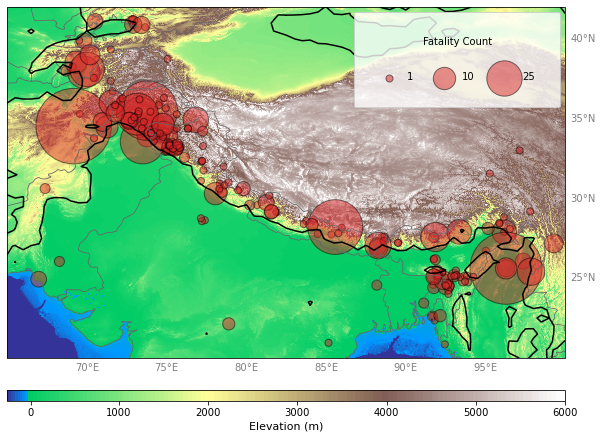

In [40]:
# Set up projection
mapcrs = ccrs.PlateCarree()
datacrs = ccrs.PlateCarree()

# Set tick/grid locations
dx = np.arange(lonmin,lonmax+5,5)
dy = np.arange(latmin,latmax+5,5)

# Create figure
fig = plt.figure(figsize=(10,11))
filepath = path_to_figs + 'all_landslides.png'
nrows = 1
ncols = 1

# Set up Axes Grid
axes_class = (GeoAxes,dict(map_projection=mapcrs))
axgr = AxesGrid(fig, 
                111, 
                axes_class=axes_class,
                nrows_ncols=(nrows, ncols), 
                axes_pad = 0.45,
                cbar_location='bottom', 
                cbar_mode='single',
                cbar_pad=0.0, 
                cbar_size='3%',
                label_mode='')

# Loop for drawing each plot
for k, ax in enumerate(axgr):
    ax = draw_basemap(ax, extent=[lonmin,lonmax,latmin,latmax], xticks=dx, yticks=dy, left_lats=False, right_lats=True)
    
    # topo with bright cmap
    cf = ax.pcolormesh(lons, lats, topo, rasterized=True, norm=divnorm,
                        cmap=terrain_map, shading='auto')
    
    # Contour Lines (terrain)
    clevs=np.array([1000])
    cs = ax.contour(newlons, newlats, regrid_topo.bedrock, clevs, colors='k', linewidths=1.5,
                    linestyles='solid', transform=datacrs)
    
    # Bubbles
    x = df['longitude']
    y = df['latitude'] 
    z = df['fatality_count']
    z = z.replace(np.nan, 0) # replace nan with zeros
    z = z.replace(0, 1) # replace zeros with ones (for plotting purposes)
    
    scl = 50
    sc = ax.scatter(x, y, c='tab:red', s=z*scl, marker='o', alpha=0.5, transform=mapcrs, edgecolors='k')
    
    # legend
    msizes = [1*scl, 10*scl, 25*scl]
    markers = []
    for size in msizes:
        markers.append(plt.scatter([],[], s=size, c='tab:red', edgecolors='k', label=(int(size/scl)), alpha=0.5))

    ax.legend(handles=markers, loc='upper right', labelspacing=2.5, borderpad=2.5, title='Fatality Count', ncol=3)
    
#     # sort data
#     test=df.sort_values('fatality_count')
#     test['Fatality Count (#)'] = pd.cut(test["fatality_count"], [0, 25, 50, 100, 125], labels=["< 25", "25-49", "50-99", "100-125"])
#     cpal = sns.color_palette("cmo.amp", n_colors=4)
#     sc = plt.scatter(xy, xy, c=z, vmin=0, vmax=20, s=35, cmap=cm)
#     cbar = fig.colorbar(sc, ticks=[0, 1, 15])
#     sc = ax.scatter(x, y, c=z, s=75, marker='o', cmap=cpal, alpha=0.5, transform=mapcrs, edgecolors='k')
    
    # g = sns.scatterplot(data=test, x="longitude", y="latitude", ax=ax, hue='Fatality Count (#)',  palette=cpal, legend=True, transform=mapcrs)

    
    # subtitles
#     ax.set_title('Landslides in Southern Asia', loc='left', fontsize=12)
    
# Colorbar (single)
cb = fig.colorbar(cf, axgr.cbar_axes[0], orientation='horizontal', drawedges=False)
cb.set_label('Elevation (m)', fontsize=11)
cb.ax.tick_params(labelsize=10)
    
# Display figure
plt.savefig(filepath, dpi=300, bbox_inches='tight')
plt.show()

In [25]:
z*scl

event_date
2007-03-19 00:00:00     50.0
2015-04-02 00:00:00      0.0
2016-02-22 23:00:00      0.0
2014-02-28 00:00:00      0.0
2011-02-13 00:00:00      NaN
                       ...  
2017-05-05 13:22:00      0.0
2017-04-21 17:55:00    100.0
2017-04-06 13:19:00    125.0
2017-04-23 17:58:00      0.0
2017-03-25 17:32:00     50.0
Name: fatality_count, Length: 274, dtype: float64

In [ ]:
test['fatality_count'].describe()

In [ ]:
df['fatality_count'].sum()

In [ ]:
df.loc[(df['fatality_count'] == 114.)]
# df.sort_values(by=['fatality_count'])[-50:]